# DAY3

## 1. 모델 구현을 통한 pytorch 실습(ANN분류 모델)

### 1) 라이브러리 import

In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import pandas as pd
import time

import warnings
warnings.filterwarnings(action='ignore')

- torch : 파이토치(딥러닝)
- numpy : 수학연산 모듈
- sklearn : 머신러닝 모듈(데이터셋 method만)
- torch.nn.functional : 파이토치 method 사용을 위해
- seaborn : 시각화 모듈
- pandas : 데이터 테이블 모듈
- warnings : 경고 메세지 무시하기

### 2) 데이터 생성하기

In [2]:
x_train, y_train = make_blobs(n_samples=80, n_features=2,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)

x_test, y_test = make_blobs(n_samples=20, n_features=2,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)

- make_blobs는 가우시안 분포의 데이터를 생성하는 method
- 샘플개수 80, 특성(차원)은 2, 분포의 중심점은 4곳, 샘플은 섞고, 각 점에서 생성한 클러스터의 표준편차는 0.3
- train은 80개의 데이터이고, test는 20개의 데이터이다

In [3]:
def label_map(data, a, b):
    tmp = np.copy(data)
    for i in a:
        tmp[data == i] = b
    return tmp

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

- 만든 데이터가 0, 1, 2, 3으로 레이블이 4개인데 이를 0,1 -> 0으로 2, 3 -> 1로 2개로 묶는다
- 1사분면과 3사분면, 2사분면과 4사분면은 각각 동일한 레이블을 갖는다.
- binary classification 문제

### 3) 데이터 시각화

In [4]:
tmp_graph = np.concatenate((x_train, y_train.reshape(80,1)), axis=1)
tmp_graph = pd.DataFrame(tmp_graph, columns=['x', 'y', 'label'])

In [5]:
tmp_graph.head()

,x,y,label
0,1.495621,-0.474324,1.0
1,0.877017,-0.984669,1.0
2,-1.205554,0.989646,1.0
3,0.589237,1.216042,0.0
4,-1.787398,-1.329929,0.0


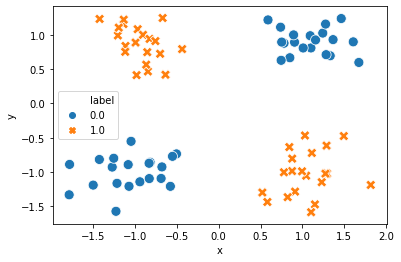

In [6]:
sns.scatterplot(x='x', y='y', hue='label',style='label',s=100, data=tmp_graph)
plt.show()

- pandas로 데이터프레임을 만들어서 시각화 준비
- seaborn이 시각화 방법이 간단하니 참고

### 4) Tenosor 변경 및 모델 생성

In [7]:
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

In [8]:
class mynet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(mynet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.Linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.Linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, data):
        out = self.Linear_1(data)
        out = self.relu(out)
        out = self.Linear_2(out)
        out = self.sigmoid(out)
        return out

- pytorch  연산을 위해 np.array를 tensor로 변환
- mynet이라는 이름의 선형모델 생성

### 5) 신경망 instance 생성 및 평가

In [9]:
model = mynet(2, 5)

learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [10]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('테스트 loss는 {}'.format(test_loss_before.item()))

테스트 loss는 0.7418786883354187


- learning rate, epochs, optimizer, loss function 등 신경망 설정을 실시
- 신경망 테스트를 통해 대략적인 성능을 확인한다
- 신경망을 훈련을 반복하여 품질을 개선한다

### 6) 신경망 훈련 및 평가

In [11]:
s_time = time.time()
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()
e_time = time.time()

Train loss at 0 is 0.7565191388130188
Train loss at 100 is 0.6630149483680725
Train loss at 200 is 0.6122743487358093
Train loss at 300 is 0.5466663837432861
Train loss at 400 is 0.47975292801856995
Train loss at 500 is 0.4169706702232361
Train loss at 600 is 0.3585531711578369
Train loss at 700 is 0.30659088492393494
Train loss at 800 is 0.26181358098983765
Train loss at 900 is 0.22457513213157654
Train loss at 1000 is 0.19410841166973114
Train loss at 1100 is 0.16929882764816284
Train loss at 1200 is 0.14882254600524902
Train loss at 1300 is 0.13187384605407715
Train loss at 1400 is 0.11753847450017929
Train loss at 1500 is 0.10539134591817856
Train loss at 1600 is 0.09503071010112762
Train loss at 1700 is 0.08628718554973602
Train loss at 1800 is 0.07884868234395981
Train loss at 1900 is 0.07245410233736038


In [13]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.08926995098590851


- zero_grad() : 파라메터를 초기화 할 때 사용하며, 이전의 정보가 중요한 RNN에서는 사용하지 않는다.
- backward() : backpropagation 계산
- optimizer.step() : backpropagation 실시

### 7) 모델 저장과 불러오기

In [14]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('Linear_1.weight', tensor([[-0.7790,  0.5540],
        [-1.6229, -1.5403],
        [-1.6964,  1.1775],
        [ 0.0771, -1.7651],
        [-1.1370, -1.0827]])), ('Linear_1.bias', tensor([ 0.0140, -0.3856, -0.0295,  1.1223, -0.2467])), ('Linear_2.weight', tensor([[ 0.7461, -2.2126,  1.9987,  1.9265, -1.4662]])), ('Linear_2.bias', tensor([-1.8171]))])


In [18]:
new_model = mynet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9924069046974182


- 모델을 저장하고 불러와서 사용할 수 있다